<a href="https://colab.research.google.com/github/sumeethkumar12/dl/blob/main/ai21btech11008__5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
469/469 [==============================] - 125s 259ms/step - loss: 183.4351
Epoch 2/20
469/469 [==============================] - 121s 258ms/step - loss: 119.7063
Epoch 3/20
469/469 [==============================] - 121s 258ms/step - loss: 111.7027
Epoch 4/20
469/469 [==============================] - 121s 257ms/step - loss: 108.7004
Epoch 5/20
469/469 [==============================] - 121s 257ms/step - loss: 106.9425
Epoch 6/20
469/469 [==============================] - 121s 257ms/step - loss: 105.5986
Epoch 7/20
469/469 [==============================] - 121s 258ms/step - loss: 104.6064
Epoch 8/20
469/469 [==============================] - 120s 257ms/step - loss: 103.8035
Epoch 9/20
469/469 [==============================] - 120s 257ms/step - loss: 103.0747
Epoch 10/20
469/469 [==============================] - 121s 258ms/step - loss: 102.4967
Epoch 11/20
469/469 [==============================] - 121s 257ms/step - loss: 101.9560
Epoch 12/20
469/469 [====================

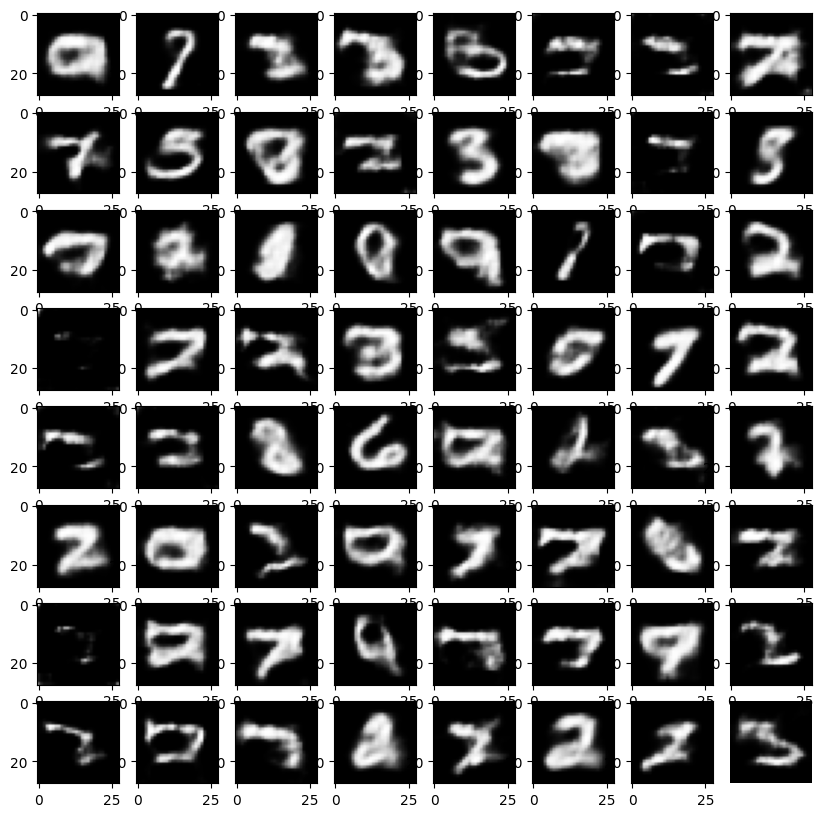

In [ ]:
# 2 Variational Autoencoder (VAE):
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

latent_dim = 16

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)


z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

#  encoder model
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

#  decoder model
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

#  vae 
outputs = decoder(encoder(encoder_inputs)[2])
vae = keras.Model(encoder_inputs, outputs, name="vae")

# loss
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, outputs)
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer=keras.optimizers.Adam())

vae.fit(x_train, epochs=20, batch_size=128)

# generating images
latent_space = np.random.normal(size=(64, latent_dim))
generated_images = decoder.predict(latent_space)

fig, axs = plt.subplots(8, 8, figsize=(10, 10))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(generated_images[i*8+j,:,:,0], cmap='gray')
axs[i,j].axis('off')
plt.show()


1875/1875 [==============================] - 3s 1ms/step
Hidden dimension: 32 - Train loss: 0.0105
313/313 [==============================] - 1s 1ms/step
Hidden dimension: 32 - Test loss: 0.0102
Train data reconstructions for hidden dimension 32:
Original - Loss: 0.0152


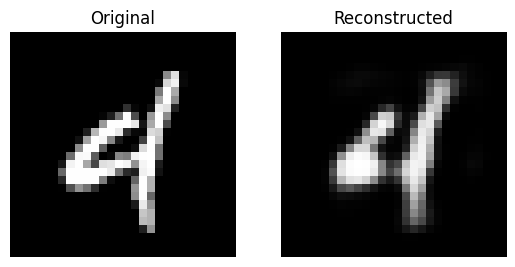

Original - Loss: 0.0165


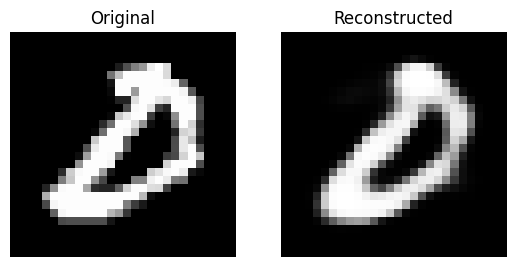

Original - Loss: 0.0065


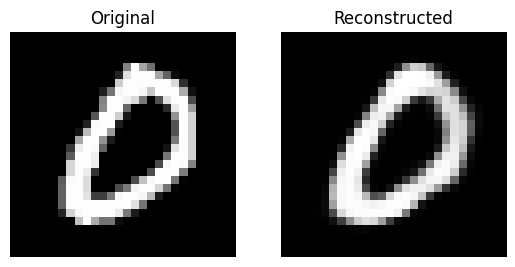

Original - Loss: 0.0367


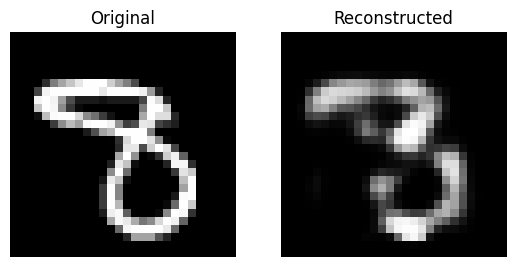

Original - Loss: 0.0079


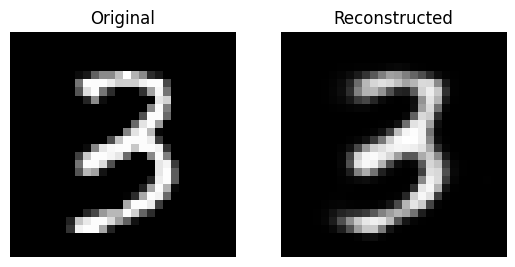

Original - Loss: 0.0137


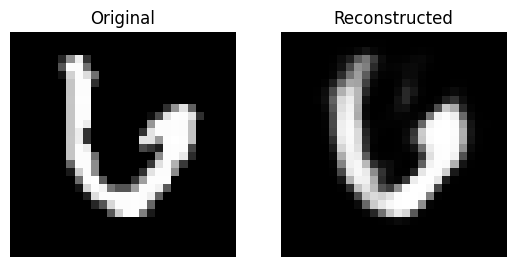

Original - Loss: 0.0190


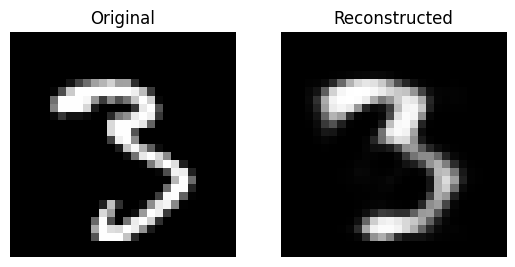

Original - Loss: 0.0045


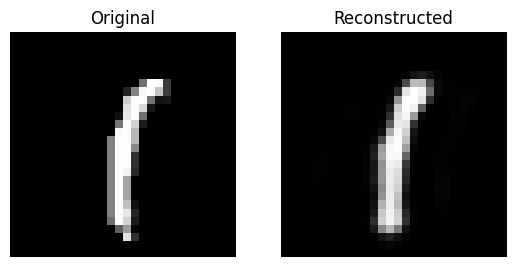

Original - Loss: 0.0056


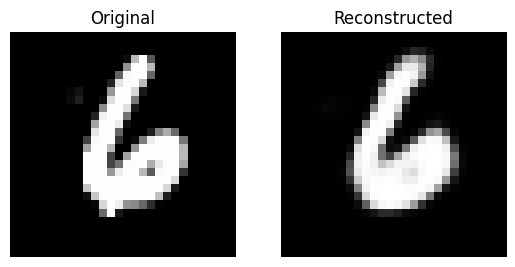

Original - Loss: 0.0148


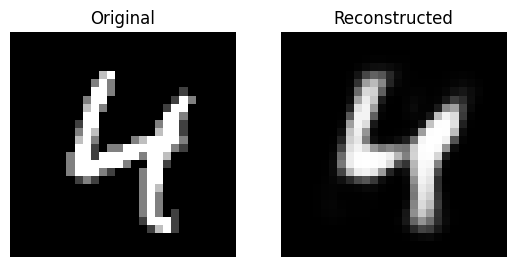

Test data reconstructions for hidden dimension 32:
Original - Loss: 0.0098


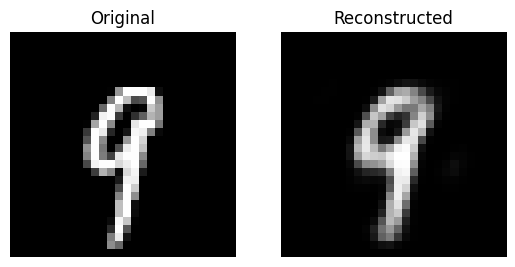

Original - Loss: 0.0039


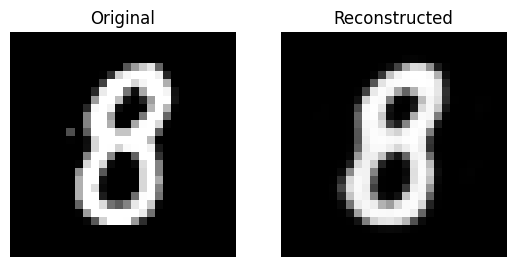

Original - Loss: 0.0137


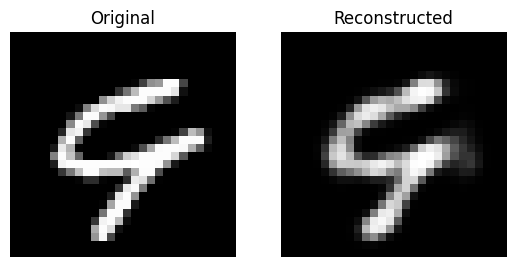

Original - Loss: 0.0056


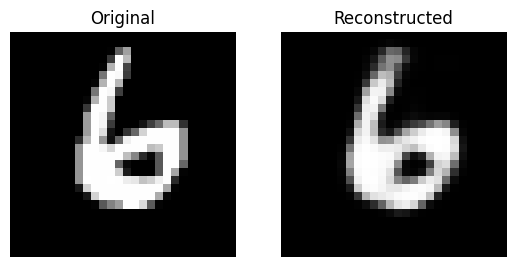

Original - Loss: 0.0058


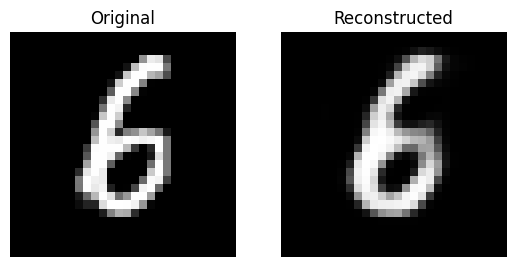

Original - Loss: 0.0149


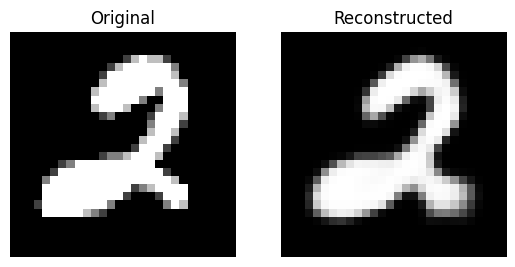

Original - Loss: 0.0186


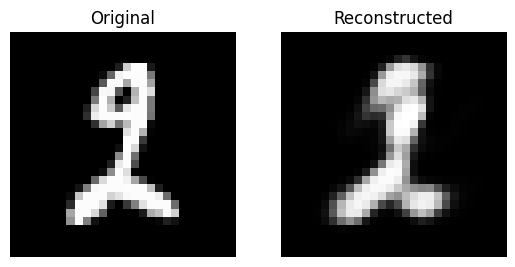

Original - Loss: 0.0060


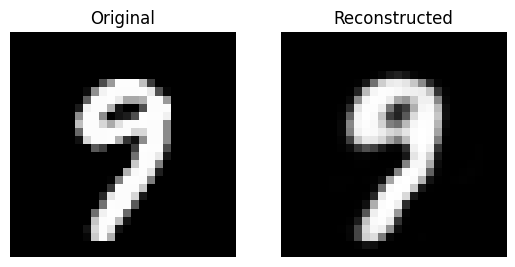

Original - Loss: 0.0127


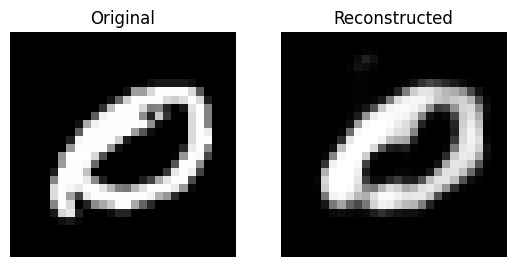

Original - Loss: 0.0085


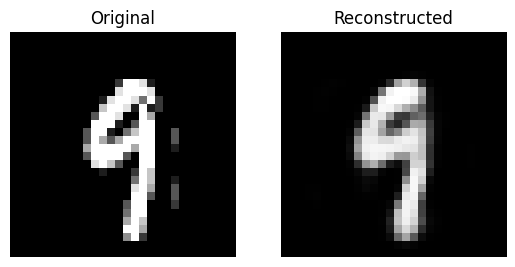

AttributeError: ignored

In [ ]:
# 1 Autoencoders:
#1 a
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# autoencoder models
input_shape = x_train.shape[1]
hidden_dims = [32, 64]

for hidden_dim in hidden_dims:
    input_layer = Input(shape=(input_shape,))
    hidden_layer = Dense(hidden_dim, activation='relu',
                         activity_regularizer=regularizers.l1(10e-5))(input_layer)
    output_layer = Dense(input_shape, activation='sigmoid')(hidden_layer)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    
    autoencoder.fit(x_train, x_train,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)

    train_reconstructions = autoencoder.predict(x_train)
    train_loss = np.mean(np.square(train_reconstructions - x_train))
    print(f'Hidden dimension: {hidden_dim} - Train loss: {train_loss:.4f}')

    test_reconstructions = autoencoder.predict(x_test)
    test_loss = np.mean(np.square(test_reconstructions - x_test))
    print(f'Hidden dimension: {hidden_dim} - Test loss: {test_loss:.4f}')

    # 10 random train and test data reconstructions
    np.random.seed(42)
    train_idx = np.random.randint(0, len(x_train), size=10)
    test_idx = np.random.randint(0, len(x_test), size=10)
    print(f'Train data reconstructions for hidden dimension {hidden_dim}:')
    for i in train_idx:
        img_orig = x_train[i].reshape(28, 28)
        img_recon = train_reconstructions[i].reshape(28, 28)
        print(f'Original - Loss: {np.mean(np.square(img_orig - img_recon)):.4f}')
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(img_orig, cmap='gray')
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(img_recon, cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
        plt.show()

    print(f'Test data reconstructions for hidden dimension {hidden_dim}:')
    for i in test_idx:
        img_orig = x_test[i].reshape(28, 28)
        img_recon = test_reconstructions[i].reshape(28, 28)
        print(f'Original - Loss: {np.mean(np.square(img_orig - img_recon)):.4f}')
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(img_orig, cmap='gray')
        plt.title('Original')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(img_recon, cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
        plt.show()

 # 1b
   



In [ ]:
# 3 Self-Attention:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=8):
        super(SelfAttention, self).__init__()

        
        self.squeeze = nn.Conv2d(in_channels, in_channels // reduction_ratio, 1)
        self.excitation = nn.Conv2d(in_channels // reduction_ratio, in_channels, 1)

    def forward(self, x):
        # global average pooling
        x_pool = F.avg_pool2d(x, x.size()[2:])

        # squeeze operation
        x_squeeze = self.squeeze(x_pool)

        # relu activation function
        x_squeeze = F.relu(x_squeeze)

        
        x_excitation = self.excitation(x_squeeze)

        # sigmoid activation function
        x_excitation = torch.sigmoid(x_excitation)

      
        x = x * x_excitation

        return x


class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.attention1 = SelfAttention(64, reduction_ratio=8)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.attention2 = SelfAttention(256, reduction_ratio=8)
        self.fc = nn.Linear(256 * 4 * 4, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = self.attention1(x)
        x = self.conv3(x)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2)
        x = self.attention2(x)
        x = x.view(-1, 256 * 4 * 4)
        x = self.fc(x)
        return x



In [ ]:
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
num_epochs = 10

#
for epoch in range(num_epochs):
    
    model.train()

    # Iterate over the training data
    for i, (images, labels) in enumerate(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        #  the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        #  the loss every 50 iterations
        if (i + 1) % 50 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    
    model.eval()

    
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print('Epoch [{}/{}], Test Accuracy: {:.2f}%'
              .format(epoch + 1, num_epochs, accuracy))
